So far we've been using the simplex method to solve our linear programs. This works great when you don't need to worry about what types of numbers you return. What happens when decimal answers don't make sense? What does it mean to have 1/2 of a shoe? Consider the following example

You are going on a hike. You know that you can only carry 20 pounds of stuff in your bag. You have a list of items, their values, and their weights. What will you choose to bring?

|Item|Weight (lbs)|Value|
|---|---|---|
|Flashlight|1.0|10|
|Candy|0.5|1|
|Telescope|10|30|
|Tent|15|50|
|Water Purifier|5|10|
|Campfire Starter|0.5|10|
|Fishing Pole|2.0|5|

For simplicity sake, let's say that you can only have one of each. How would you go about finding the best solution?

---
# Branching
The nice thing about integer programs is that we have a finite solution space. Since our choice variables can only take on the integer values, we only need to consider those individual values. We can actually iterate over all possible combinations in our solution space _S_. We're going to iterate over the space in a very specific way. In our case we are going to break up our solution space into multiple different subspaces. For every item $x_i \in S$ we will create create a subspace by fixing the value of $x_i$. This type of brute force algorithm is known as _Branching_ because we form a tree with our solution spaces. 

The branch algorithm that we will use is designed specifically to minimize our objective function, but that is okay because if we wanted to maximize the function we would just minimize the negative. that is 

$max: f(x) = min: -f(x)$


In our example, we would create all possible knapsacks. For each item, we create two branches, one that includes the item and one that doesn't. For n items, we will then create $2^n$ knapsacks and then calculate the value of each knapsack. The knapsack will be 0 if it goes over our weight capacity and will have its normal value if it is less than or equal to the weight capacity.

---
# Bound

When we do a lot of branching we get really unruly trees and really slow algorithms. To improve our runtime and optimize we are actually going to keep track of the minimum bounds and make some type of rule to prune our tree. This mehtod was first proposed by the London School of Economics team sponsored by BP. It was first used for a type of problem called the Traveling salesman. we'll get into that later though.

This isn't a math class, so we will avoid a rigorous proof. All you will need to know is that the pruning algorithm eliminates all of the proveably suboptimal solutions.

# Branch and Bound Implementation

Time to put it all together. To do this let's define some notation. This notation will help us build a data structure that will then be put into code. We already have our solution space S. Let's also define each instance of a choice variable as I. We now need to create three different operations that we will perform:
- branch(I): we will create a branch of S for every possible value of I in our subspace.
- bound(I): we compute the lowerbound on the value at any candidate solution in the space represented by I. That is $bound(I)\leq f(x) \forall x \in S_I$
-solution(I) determins whether or not the instance is a candidate

Our pseudo code will be the following

1) We're going to initialize our lower bound. $B$. We can use some sort of  heuristic estimate like an average value or we can just set it to infinity.

2) We will create a queue to hold a partial solution with none of the variables assigned.

3) Loop until our queue is empty.
> a) Take a Node N off the queue

> b) $x_N$ represents a candidate solution at N. 
>> *If* $f(x_N) < B$ then $B \leftarrow f(x_N)$

>> *Else*: Branch on N to produce new nodes $N_i$
>>> For each $N_i$:
>>>> *If* $bound(N_i) > B$ do nothing. It is a lost cause.
>>>> *Else*: store $N_i$ on the queue. It's a new candidate.



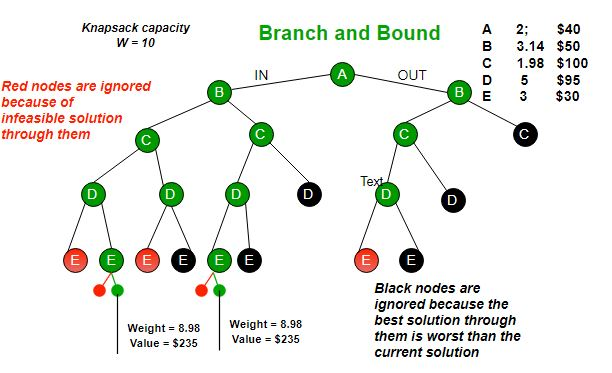

# Example:

Let's do this on our knapsack. Once again here's our matrix.

|Variable|Item|Weight (lbs)|Value|
|---|---|---|---|
|$x_1$|Flashlight|1.0|10|
|$x_2$|Candy|0.5|1|
|$x_3$|Telescope|10|30|
|$x_4$|Tent|15|50|
|$x_5$|Water Purifier|5|10|
|$x_6$|Campfire Starter|0.5|10|
|$x_7$|Fishing Pole|2.0|5|

In order to have the best possible experience on our hike we want to Maximize $\displaystyle\sum_{i=1}^y x_i$

But our algorithm works best for minimization so instead we will Minimize $-\displaystyle\sum_{i=1}^y x_i$
Let's start with step 1. We don't really have a clever heuristic at the moment. If we do this problem a couple times, we can probably figure out a general rule, but not for now. We'll set $B = \infty$
2) Let's make an empty queue
3)Let's go through the examples and maybe write some code for it. An actual implementation is best done with a tree type data structure so we won't go into it since it exceeds the scope of this class

# Resources
https://stanford.edu/class/ee364b/lectures/bb_slides.pdf

https://en.wikipedia.org/wiki/Branch_and_bound

https://www.geeksforgeeks.org/branch-and-bound-algorithm/

https://www.sciencedirect.com/topics/computer-science/branch-and-bound-algorithm-design

https://towardsdatascience.com/the-branch-and-bound-algorithm-a7ae4d227a69